## LangGraph Conditional Workflow: Age Group Categorizer

- **State:** Tracks `age` and assigned `group`.
- **Start Node:** Decides path based on person's age.
- **Conditional Routing:** Branches to one of four nodes:
  - `child_group` (<13)
  - `teenager_group` (13–17)
  - `adult_group` (18–59)
  - `senior_group` (60+)
- **End:** Returns the final age group label in the state.



In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [2]:
# Define the State
class AgeState(TypedDict):
    age: int
    group: str

In [3]:
def categorize_age(state: AgeState) -> Literal['child', 'teenager', 'adult', 'senior']:
    age = state['age']
    if age < 13:
        return 'child'
    elif 13 <= age < 18:
        return 'teenager'
    elif 18 <= age < 60:
        return 'adult'
    else:
        return 'senior'

def child_group(state: AgeState):
    return {'group': 'Child (under 13)'}

def teenager_group(state: AgeState):
    return {'group': 'Teenager (13-17)'}

def adult_group(state: AgeState):
    return {'group': 'Adult (18-59)'}

def senior_group(state: AgeState):
    return {'group': 'Senior (60+)'}

In [4]:
# Setup graph
graph = StateGraph(AgeState)
graph.add_node('categorize', categorize_age)
graph.add_node('child', child_group)
graph.add_node('teenager', teenager_group)
graph.add_node('adult', adult_group)
graph.add_node('senior', senior_group)

graph.add_edge(START, 'categorize')
graph.add_conditional_edges('categorize', categorize_age)
graph.add_edge('child', END)
graph.add_edge('teenager', END)
graph.add_edge('adult', END)
graph.add_edge('senior', END)


In [5]:
workflow = graph.compile()

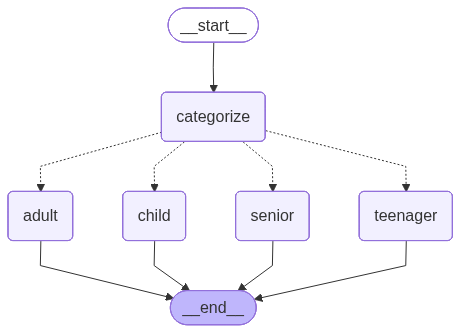

In [6]:
workflow